In [7]:
%%bash

# When running from inside this repo:
# cd ../..
# python setup.py install
# or
# pip install --prefix .

# When running independently
# pip install -U git+https://github.com/neomatrix369/nlp_profiler.git

pip install nlp_profiler
echo "Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect"

Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [9]:
import pandas as pd

import sys
sys.path.insert(0, '../..')

from nlp_profiler.core import apply_text_profiling

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/satyasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/satyasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [11]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. This is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [12]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. This is not ...
2,2833047 and 1111 people live in this area.
3,"This sentence doesn't seem to too many commas,..."
4,Todays date is 04/28/2020 for format mm/dd/yyy...
5,Todays date is 28/04/2020 and tomorrow's date ...
6,Everyone here is so hardworking. Hardworking p...


## Pandas describe() function

In [13]:
text_dataframe.describe()

,text
count,7
unique,7
top,2833047 people live in this area. This is not ...
freq,1


## NLP profiler's equivalent to that

In [14]:
%%time
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text', params={'parallelism_method': 'default'})
profiled_text_dataframe.head()

final params: {'high_level': True, 'granular': True, 'grammar_check': False, 'spelling_check': True, 'parallelisation_method': 'default', 'parallelism_method': 'default'}





CPU times: user 858 ms, sys: 123 ms, total: 982 ms
Wall time: 7.6 s


,text,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,...,dates_count,sentiment_polarity_score,sentiment_polarity,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised
0,I love ⚽ very much 😁.,2,21,5,4,0,16,2,0,13,...,0,0.380000,Pretty positive,Positive,0.43,Objective/subjective,Objective/subjective,1.000000,Very good,Good
1,2833047 people live in this area. This is not ...,3,58,11,11,3,47,0,1,45,...,0,-0.106818,Pretty negative,Negative,0.55,Objective/subjective,Objective/subjective,1.000000,Very good,Good
2,2833047 and 1111 people live in this area.,2,42,7,6,0,35,0,2,34,...,0,0.136364,Pretty positive,Positive,0.50,Objective/subjective,Objective/subjective,1.000000,Very good,Good
3,"This sentence doesn't seem to too many commas,...",2,74,11,13,0,63,0,0,56,...,0,0.375000,Pretty positive,Positive,0.75,Pretty subjective,Subjective,0.764706,Pretty good,Good
4,Todays date is 04/28/2020 for format mm/dd/yyy...,2,64,8,9,0,56,0,6,48,...,1,0.000000,Neutral,Neutral,0.00,Very objective,Objective,0.454545,Bad,Bad


### Sentiment Analysis

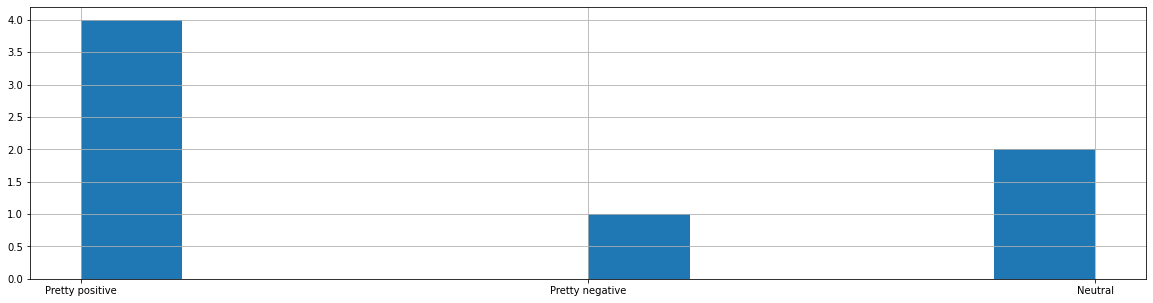

In [16]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['sentiment_polarity'].hist()

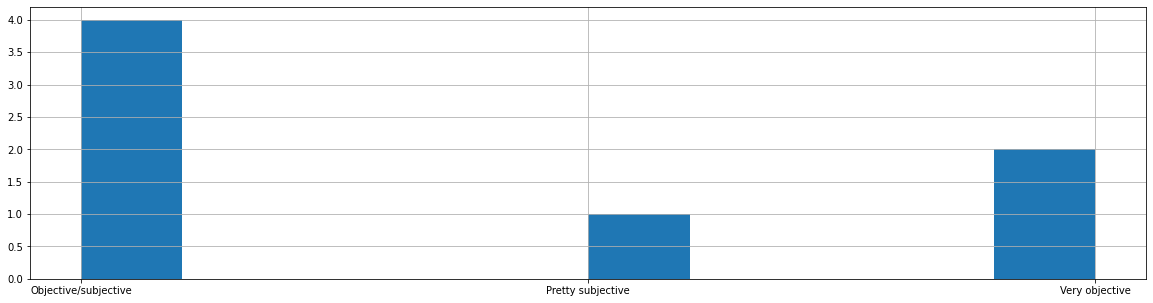

In [17]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['sentiment_subjectivity'].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

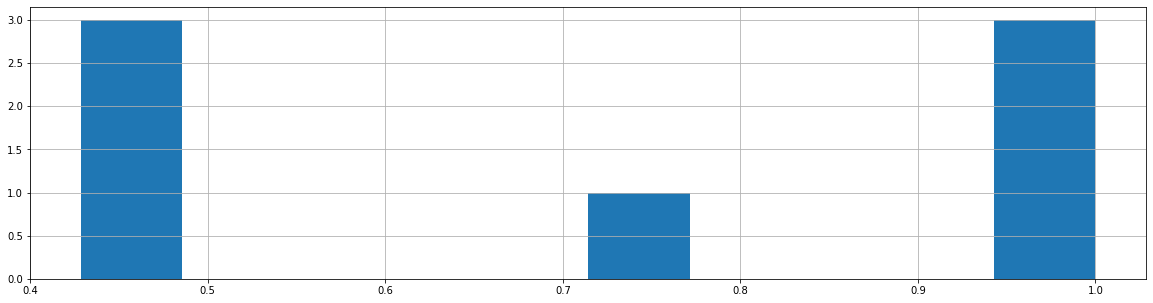

In [18]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['spelling_quality_score'].hist()

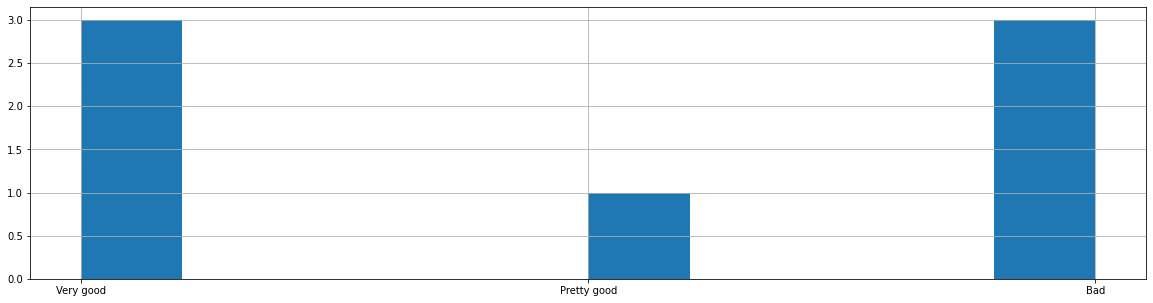

In [19]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe['spelling_quality'].hist()

### Running describe() on the new NLP profiler generated dataframe

In [20]:
profiled_text_dataframe.describe()

,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.428571,61.571429,9.571429,9.857143,1.142857,52.000000,0.285714,2.142857,47.714286,13.857143,4.00000,3.714286,0.428571,0.212078,0.404286,0.728910
std,0.786796,28.129801,3.909695,4.670067,1.463850,24.481285,0.755929,2.734262,23.921499,4.634241,2.94392,1.889822,0.786796,0.285829,0.293193,0.277641
min,2.000000,21.000000,5.000000,4.000000,0.000000,16.000000,0.000000,0.000000,13.000000,8.000000,1.00000,1.000000,0.000000,-0.106818,0.000000,0.428571
25%,2.000000,50.000000,7.500000,7.000000,0.000000,41.000000,0.000000,0.000000,39.500000,10.500000,1.50000,3.000000,0.000000,0.000000,0.215000,0.454545
50%,2.000000,60.000000,8.000000,9.000000,0.000000,52.000000,0.000000,1.000000,46.000000,14.000000,3.00000,3.000000,0.000000,0.136364,0.500000,0.764706
75%,2.500000,69.000000,11.000000,12.000000,2.500000,59.500000,0.000000,4.000000,52.000000,17.000000,6.50000,4.500000,0.500000,0.377500,0.575000,1.000000
max,4.000000,112.000000,17.000000,18.000000,3.000000,95.000000,2.000000,6.000000,92.000000,20.000000,8.00000,7.000000,2.000000,0.700000,0.750000,1.000000


### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html
- [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
- [Words of estimative probability](https://en.wikipedia.org/wiki/Words_of_estimative_probability)
- [NLP Profiler source file](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/library/org/neomatrix369/nlp_profiler.py)
- [Kaggle Utility script](https://www.kaggle.com/neomatrix369/nlp-profiler-class)
- [Kaggle kernel](https://www.kaggle.com/neomatrix369/nlp-profiler-simple-dataset)
- [Awesome AI-ML-DL: Better NLP library](https://bit.ly/better-nlp-launch)
- [Awesome AI-ML-DL: NLP Resources](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/natural-language-processing)
- [Awesome AI-ML-DL Github](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/)